## Observations and Insights

## Dependencies and starter code

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata)
study_df = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, study_df, on='Mouse ID', how='outer')

In [32]:
merge_df.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


 Summary statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = merge_df.groupby(["Drug Regimen"])


tumor_summary= pd.DataFrame({
    "Tumor mean":regimen_df['Tumor Volume (mm3)'].mean(),
    "Tumor Median": regimen_df["Tumor Volume (mm3)"].median(),
    "Tumor Variance": regimen_df["Tumor Volume (mm3)"].var(),
    "Tumor Stdev": regimen_df["Tumor Volume (mm3)"].std(),
    "Tumor SEM": regimen_df['Tumor Volume (mm3)'].sem(),},
    )

tumor_summary

 



,Tumor mean,Tumor Median,Tumor Variance,Tumor Stdev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

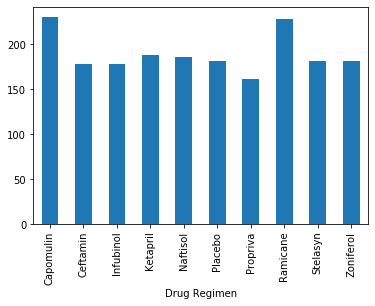

In [34]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regiment_count = regimen_df.count()['Mouse ID']
regiment_count.plot(kind="bar")


<BarContainer object of 10 artists>

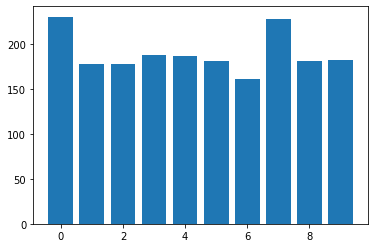

In [35]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis= np.arange(len(regiment_count))
plt.bar(x_axis,regiment_count)
# xticks = [] to fix x axis labels

## Pie plots

In [60]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = merge_df.groupby(["Mouse ID","Sex"])

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#gender_df
mouse_gender


,Total Count
Sex,
Female,124
Male,125


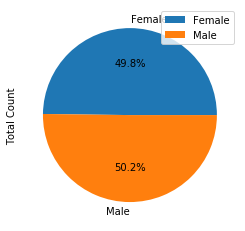

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

plot = mouse_gender.plot.pie(y='Total Count',autopct="%1.1f%%")


## Quartiles, outliers and boxplots

In [39]:
#Extract the top 4 regimenes from the data frame in order to perform IQR test on each
best_regimes = merge_df[merge_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [68]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#IQR = Interquartile Range
#top 4 treatments from graphs are capomulin, ceftamin, Infubinol and Ketapril
# set your treatment regimen variable and pull your complete data frame for "drug regimen" and the specific reviewed drugs

treatment_regimen = merge_df[merge_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#sort values from your drugs listed by time point
treatment_regimen = treatment_regimen.sort_values(["Timepoint"], ascending=True)
#redefine your treatment regimen with the column labels
treatment_regimen_data = treatment_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#table
treatment_regimen_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


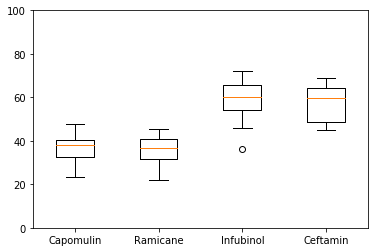

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_regimen_sort = treatment_regimen_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
treatment_regimen_sort.head()
treatment_regimen_df = treatment_regimen_sort.to_frame()
treatment_regimen_df
four_drugs = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

boxplot_df = treatment_regimen_df.reset_index()
lists = boxplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
list_df = pd.DataFrame(lists)

list_df = list_df.reindex(four_drugs)

#look for volume
tumor_volume = [vol for vol in list_df['Tumor Volume (mm3)']]
#create the box plot
plt.boxplot(tumor_volume, labels=four_drugs)
#set y axis limits
plt.ylim(0, 100)
plt.show()

## Line and scatter plots

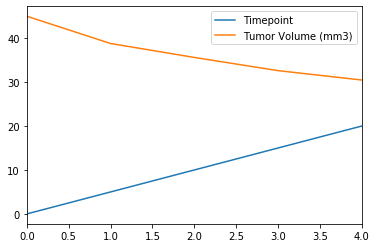

In [66]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#single mouse only - look for the specific ID mentioned within the merged data from csv files 

single_mouse = merge_df[merge_df["Mouse ID"].isin(["f966"])]
single_mouse
# Extract the following columns: Mouse ID, Time Point and Tumor Volume (mm3)
time_versus_tumor = single_mouse[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_versus_tumor
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reset_index.html
reset_df = time_versus_tumor.reset_index()
reset_df
line_plot = reset_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot

#create your variable to print - use your isolated columns and plot the line 
lines = line_plot.plot.line()

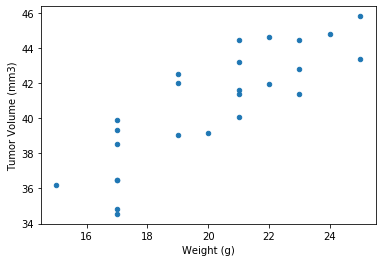

In [82]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Isolate capumulin data
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_info = merge_df[merge_df["Drug Regimen"].isin(["Capomulin"])]
capomulin_info
capomulin_weight = capomulin_info.groupby("Mouse ID")["Weight (g)","Tumor Volume (mm3)"].mean()
capomulin_weight
scatter_plot = capomulin_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

In [77]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_info.iloc[:,4]
tum_vol= capomulin_info.iloc[:,6]
correlation = sp.pearsonr(weight, tum_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.53


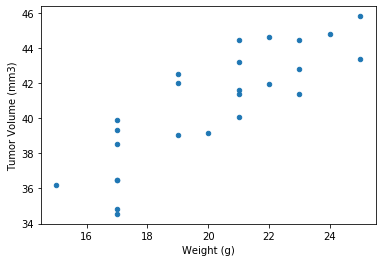

In [84]:
scatter_plot = capomulin_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

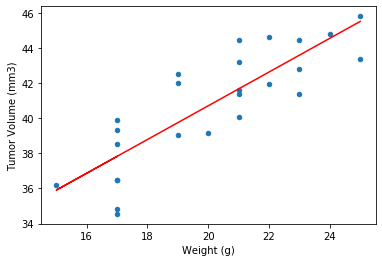

In [87]:
scatter_plot = capomulin_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
x_values = weight
y_values = tum_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel("Weight")
# plt.ylabel("Tumor Volume")
plt.show()